K Nearest Neighbors is a supervised machine learning algorithm that classifies data points based on proximity to known data classifications.  This is particularly useful for data pre-processing when filling in missing data, predictions, and forecasts.


PROS:
* Easy to implement with few parameters
* Adaptable


CONS:
* Does not scale very well.  
* Lazy Algorithm:  More data = less efficiency (higher memory and slower processing because it stores all data).  
* Curse of dimensionality, meaning it does not perform well with high dimensional data inputs

1. Small K varaince:  low bias, high variance, overfitting
2. Large K variance:  high bias, low variance, underfitting

In [27]:
from operator import itemgetter

import numpy as np
import statistics

from sklearn import datasets
import matplotlib.pyplot as plt

Load sample data from scikit-learn

In [28]:
iris = datasets.load_iris()

x = list(iris.data[:,0])
y = list(iris.data[:,1])

Load data grouping labels

In [29]:
labels = list(iris.target)

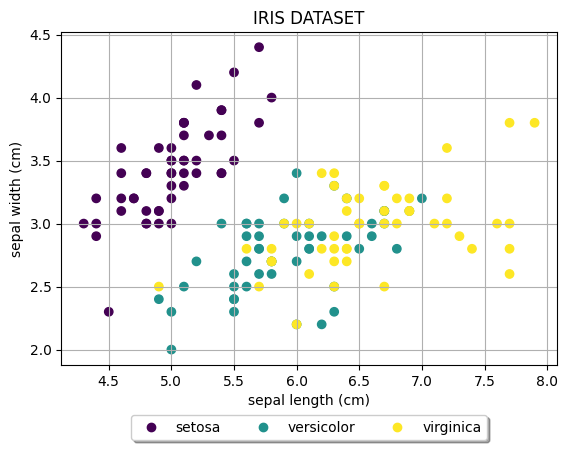

In [30]:
#  plot data
_, ax = plt.subplots()
scatter = ax.scatter(
    x,y,
    c=labels)

#  legend box
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)

ax.set_title('IRIS DATASET')
ax.grid(True)


plt.show()

Euclidean distance calculation to measure the new point's proximity to known data points

In [31]:
#  linear distance between 2 points
def get_equclidean_distance(pt1, pt2):
    dist = np.sqrt(
        (pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2
        )
    
    return dist

Define K, or how many neighbors we want to comapre the new point to for classification. 

* It's better to choose an odd number to avoid ties in classification

In [32]:
k = 3  # better to choose an odd number to avoid ties in classification

In [33]:
data = list(zip(x, y))

Create a new point and plot it among the existing data.  It looks like it falls between all 3 classifications.

In [34]:
new_point = [6, 3.7]

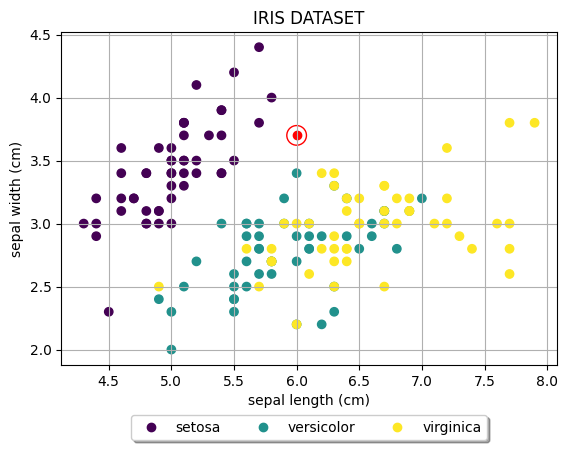

In [35]:
#  plot data
_, ax = plt.subplots()
scatter = ax.scatter(
    x,y,
    c=labels)

ax.scatter(new_point[0], new_point[-1], c='red')
ax.scatter(new_point[0], new_point[-1], s=200, c='none', edgecolors='r')

#  legend box
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)

ax.set_title('IRIS DATASET')
ax.grid(True)


plt.show()

Calculate the distances between points and record in the distance table.

In [36]:
def get_distances(data, new_point):
    #  k nearest neighbors algorithm
    distances = []
    for data_point_idx, data_point in enumerate(data):
        dist = get_equclidean_distance(pt1=new_point, pt2=data_point)
        distances.append((float(dist), data_point_idx, int(labels[data_point_idx])))

    return distances

In [37]:
distances = get_distances(data, new_point)

Sort the data from nearest to farthest proximity from the new point

In [38]:
distances.sort()

Select only the top K points that are closest to the new point.  Based on the nearest_neighbors variable printed below, the top 3 closest points are:

0. two votes
1. one vote

The KNN algorithm assigns the new point the classification that gave the most 'votes', so we assign the new point classification 0.

In [39]:
nearest_neighbors = distances[:k]
print(nearest_neighbors)

[(0.30000000000000027, 85, 1), (0.31622776601683766, 18, 0), (0.3605551275463989, 14, 0)]


Assign the new point to the category that most of the closest points correspond to.

In [40]:
neighbor_labels = list(map(itemgetter(-1), nearest_neighbors))
neighbor_categorization = statistics.mode(neighbor_labels)  # from which category did the new point receive the most 'votes'

Add the data to the input arrays and plot so we can see how the model classified the new data points.

In [41]:
#  append new data point with classification to data set
x.append(new_point[0])
y.append(new_point[-1])
labels.append(neighbor_categorization)

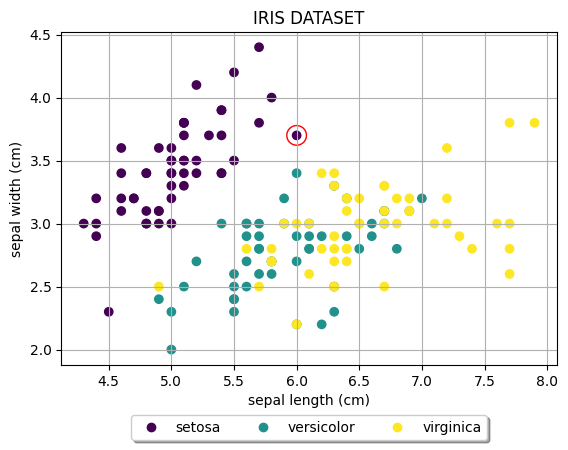

In [42]:
#  plot data
_, ax = plt.subplots()
scatter = ax.scatter(
    x,y,
    c=labels)

ax.scatter(new_point[0], new_point[-1], s=200, c='none', edgecolors='r')

#  legend box
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)

ax.set_title('IRIS DATASET')
ax.grid(True)


plt.show()

-----

The K Nearest Neighbors algorithm can also be implemented with the the scikit-learn library

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
iris = datasets.load_iris()
X_train = iris.data[:,:2]  # features, defined by the input data
labels = list(iris.target) # labels (categories, classifications for each data point), defined by the input data

To simplify plotting the data, let's break out the x components and y components into separate lists.  This is not necessary, but my preference for this demo.

In [45]:
x = list(map(itemgetter(0), X_train))
y = list(map(itemgetter(-1), X_train))

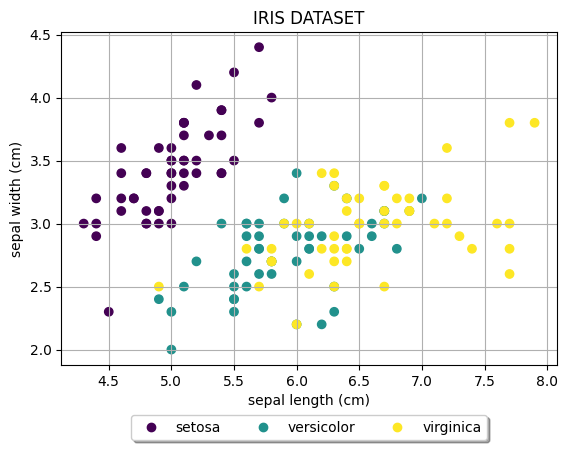

In [46]:
#  plot data
_, ax = plt.subplots()
scatter = ax.scatter(
    x,y,
    c=labels)

#  legend box
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)

ax.set_title('IRIS DATASET')
ax.grid(True)


plt.show()

We'll us the same K value from the previous example

In [47]:
knn = KNeighborsClassifier(n_neighbors=k)

Train the model with the training data (i.e. the input data and their labels)

In [48]:
knn.fit(X_train,labels)

KNeighborsClassifier(n_neighbors=3)

Let's find the classification for the new data point in our previous example, then two new ones

In [49]:
X_test = [new_point, [7.5, 3], [5.3, 2.4]]

Use the trained model to predict the new points' classifications using the K Nearest Neighbor algorithm

In [50]:
y_pred = knn.predict(X_test)

Add the data to the input arrays and plot so we can see how the model classified the new data points

In [51]:
x.extend(list(map(itemgetter(0), X_test)))
y.extend(list(map(itemgetter(-1), X_test)))
labels.extend(y_pred)

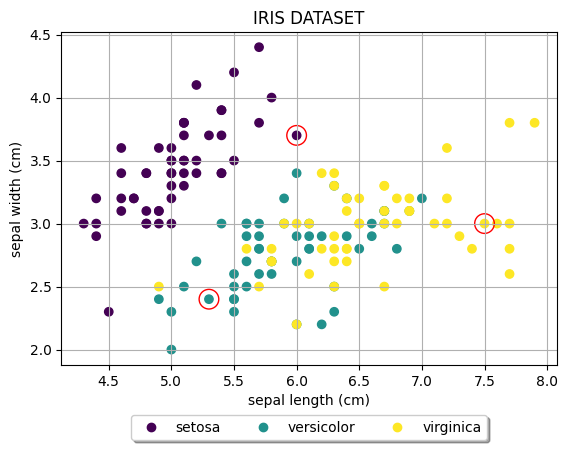

In [52]:
#  plot data
_, ax = plt.subplots()

scatter = ax.scatter(
    x,y,
    c=labels)

x_new = list(map(itemgetter(0), X_test))
y_new = list(map(itemgetter(-1), X_test))

ax.scatter(x_new, y_new, s=200, c='none', edgecolors='r')

#  legend box
box = ax.get_position()

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)

ax.set_title('IRIS DATASET')
ax.grid(True)


plt.show()

Looks like the points were properly classified, according to the KNN algorithm!  The previous example only classified 1 new point, but it classified it the same way as the scikit-learn algorithm!